In [92]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
import io

with io.open('Arrhythmia_MLR/attributes.names', mode='r', encoding='utf-8') as f:
    lines = f.readlines()
lines = [line.strip() for line in lines]
attributes=[]
for attr in lines:
    indexs=[int(s) for s in attr.split() if s.isdigit()]
    if(len(indexs)==1):
        words=attr.split(" ")
        attributes.append(words[1])
    elif(len(indexs)==2):
       words=attr.split(" ")
       for i in range(1+indexs[1]-indexs[0]):
           attributes.append(words[3]+"_"+str(i))
     
categorical_data=["Sex","Existence_of_diphasic_derivation_of_P_wave","Existence_of_diphasic_derivation_of_R_wave",
                  "Existence_of_diphasic_derivation_of_T_wave","Existence_of_ragged_P_wave",
                  "Existence_of_ragged_R_wave","Existence_of_ragged_T_wave"]

data_info_root="Arrhythmia_MLR/data_info/"

In [94]:

data = pd.read_csv('Arrhythmia_MLR/arrhythmia.data', header=None, delimiter=',', names=attributes)

In [95]:
data.head()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


SPRAWDZAMY CZY SĄ GDZIE PUSTE LUKI W DANYCH

In [96]:
data_null_sum=data.isnull().sum()
data_null_sum.to_csv(data_info_root+"data_null_sum.csv")
data_null_sum=data_null_sum.sum()
data_null_sum
#jak widac nigdzie nie brakuje danych w postaci pustej komórki

0

In [97]:
missing_values=[]
missing_values_status=[]
for attr in data.columns:
    misval=np.where(data[attr]=='?')
    missing_values_status.append([attr,misval[0]])
    if(len(misval[0])!=0):
        missing_values.append([attr,misval[0]])
pd.DataFrame(missing_values_status).to_csv(data_info_root+"data_missing_val.csv",header=False)
missing_values # puste wartosci przedstawione przy postaci znaku '?'


[['T', array([ 66,  91, 200, 212, 238, 360, 372, 412])],
 ['P',
  array([ 54,  59, 106, 108, 116, 133, 174, 177, 193, 204, 217, 219, 243,
         253, 279, 284, 298, 300, 308, 310, 350, 420])],
 ['QRST', array([241])],
 ['J',
  array([  0,   1,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
          55,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
          83,  84,  87,  90,  91,  92,  94,  95,  96,  97,  98, 100, 101,
         102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116,
         117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145,
         146, 147, 148, 149, 150,

Sprawdzenie w jakim procencie danych brakuje wartosci

In [98]:
for misval in missing_values:
    print(misval[0],"długość",len(misval[1]),"procent wartosci:",len(misval[1])/len(data))

T długość 8 procent wartosci: 0.017699115044247787
P długość 22 procent wartosci: 0.048672566371681415
QRST długość 1 procent wartosci: 0.0022123893805309734
J długość 376 procent wartosci: 0.831858407079646
Heart_rate długość 1 procent wartosci: 0.0022123893805309734


Usuniesie kolumny J i sprawdzenie drugi raz brakujacych wartosci

In [99]:
#usuwamy wartosc J gdyz brakuje w niej ponad 83 procent danych
data=data.drop(columns='J',axis=1)



In [100]:


missing_values=[]
missing_values_status=[]
for attr in data.columns:
    misval=np.where(data[attr]=='?')
    missing_values_status.append([attr,misval[0]])
    if(len(misval[0])!=0):
        missing_values.append([attr,misval[0]])
pd.DataFrame(missing_values_status).to_csv(data_info_root+"data_missing_val.csv",header=False)
missing_values # puste wartosci przedstawione przy postaci znaku '?'

[['T', array([ 66,  91, 200, 212, 238, 360, 372, 412])],
 ['P',
  array([ 54,  59, 106, 108, 116, 133, 174, 177, 193, 204, 217, 219, 243,
         253, 279, 284, 298, 300, 308, 310, 350, 420])],
 ['QRST', array([241])],
 ['Heart_rate', array([4])]]

Sprawdzamy jakie klasy chorob dla jakiej cechy są powinny być obliczane

In [101]:
sicknes_data=[]
sicknes_types=[]
for misval in missing_values:
    for col in misval[1]:
        sicknes_data.append([misval[0],data["sicknes"][col],col])
        sicknes_types.append(data["sicknes"][col])
set(sicknes_types)

{1, 2, 3, 4, 6, 7, 10, 15, 16}

Wypisujemy te cechy i ich klasy chorob dla których dane wpisujemy z srednich oraz te które wpisujemy recznie

In [102]:
mean_data=[]
manual_data=[]
for dt in sicknes_data:
    if(dt[1]!=3 and dt[1]!=4 and dt[1]!=7 and dt[1]!=15):
        mean_data.append(dt)
    else:
        manual_data.append(dt)

In [103]:
print(manual_data)

[['T', 4, 91], ['P', 15, 174], ['P', 3, 204], ['P', 15, 217], ['P', 15, 243], ['P', 3, 253], ['P', 15, 300], ['P', 15, 420], ['Heart_rate', 7, 4]]


In [104]:
mean_data

[['T', 2, 66],
 ['T', 2, 200],
 ['T', 2, 212],
 ['T', 1, 238],
 ['T', 2, 360],
 ['T', 2, 372],
 ['T', 16, 412],
 ['P', 16, 54],
 ['P', 1, 59],
 ['P', 6, 106],
 ['P', 2, 108],
 ['P', 16, 116],
 ['P', 1, 133],
 ['P', 1, 177],
 ['P', 2, 193],
 ['P', 16, 219],
 ['P', 1, 279],
 ['P', 10, 284],
 ['P', 10, 298],
 ['P', 2, 308],
 ['P', 1, 310],
 ['P', 1, 350],
 ['QRST', 1, 241]]

In [105]:

def get_mean(data,label,sicknes):
    idxs=data.loc[data["sicknes"]==sicknes].index
    arr_mean=[]
    for i in idxs:
        if data[label][i]!='?':
            arr_mean.append(data[label][i])
    return np.mean(np.array(arr_mean).astype(float))


In [106]:
for mdata in mean_data:
    data[mdata[0]][mdata[2]]=get_mean(data,mdata[0],mdata[1])

/tmp/ipykernel_3263/3856677013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mdata[0]][mdata[2]]=get_mean(data,mdata[0],mdata[1])


In [107]:
def get_arr_mean(data,label,sicknes):
    idxs=data.loc[data["sicknes"]==sicknes].index
    arr_mean=[]
    for i in idxs:
        if data[label][i]!='?':
            arr_mean.append(data[label][i])
    return arr_mean


In [108]:
for mdata in manual_data:
    print(mdata[0],mdata[1],get_arr_mean(data,mdata[0],mdata[1]))

T 4 ['46', '60', '87', '15', '-8', '38', '104', '-75', '114', '-49', '137', '66', '-42', '51']
P 15 []
P 3 ['68', '37', '43', '71', '68', '36', '50', '59', '39', '14', '72', '30', '26']
P 15 []
P 15 []
P 3 ['68', '37', '43', '71', '68', '36', '50', '59', '39', '14', '72', '30', '26']
P 15 []
P 15 []
Heart_rate 7 ['86', '63']


Dla klasy choroby 7 czyli Ventricular Premature Contraction (PVC) heart_rate waha sie od 60-100 wiec umieszczam wartosc (86+63)/2 zostanie wpisana 

In [109]:
data["Heart_rate"][4]=(86+63)/2

data["T"][91]=get_mean(data,manual_data[0][0],manual_data[0][1])

DATA

data["sicknes"].corr(data["Age"])

/tmp/ipykernel_3263/3838345569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Heart_rate"][4]=(86+63)/2
/tmp/ipykernel_3263/3838345569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["T"][91]=get_mean(data,manual_data[0][0],manual_data[0][1])


-0.0923812218060448

Sprawdzenie z zmodyfikowanie formatu danych

In [110]:
print(data.dtypes)
pd.DataFrame(data.dtypes).to_csv(data_info_root+"data_types.csv")

Age               int64
Sex               int64
Height            int64
Weight            int64
QRS_duration      int64
                 ...   
V6_2_6          float64
V6_2_7          float64
V6_2_8          float64
V6_2_9          float64
sicknes           int64
Length: 279, dtype: object


In [111]:
for column in data.columns:
    if(data[column].dtype==object):
        data[column]=data[column].astype(float)
print(data.dtypes)


pd.DataFrame(data.dtypes).to_csv(data_info_root+"data_types_changed.csv")

ValueError: could not convert string to float: '?'

ANALIZA DANYCH

In [ ]:
def create_histograms(n_vertical,n_horizontal,fig_size,dataset,titles,xlabel,ylabel,n_bins):
    fig,axs=fig,axs=plt.subplots(n_vertical,n_horizontal,figsize=fig_size)
    i=0
    
    for axr in axs:
        for ax in axr:
            if(i !=len(dataset)):
                ax.hist(dataset[i],n_bins[i])
                ax.set_title(titles[i])
                ax.set_xlabel(xlabel[i])
                ax.set_ylabel(ylabel[i])
                i+=1

In [ ]:

data["sicknes"].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: sicknes, dtype: int64

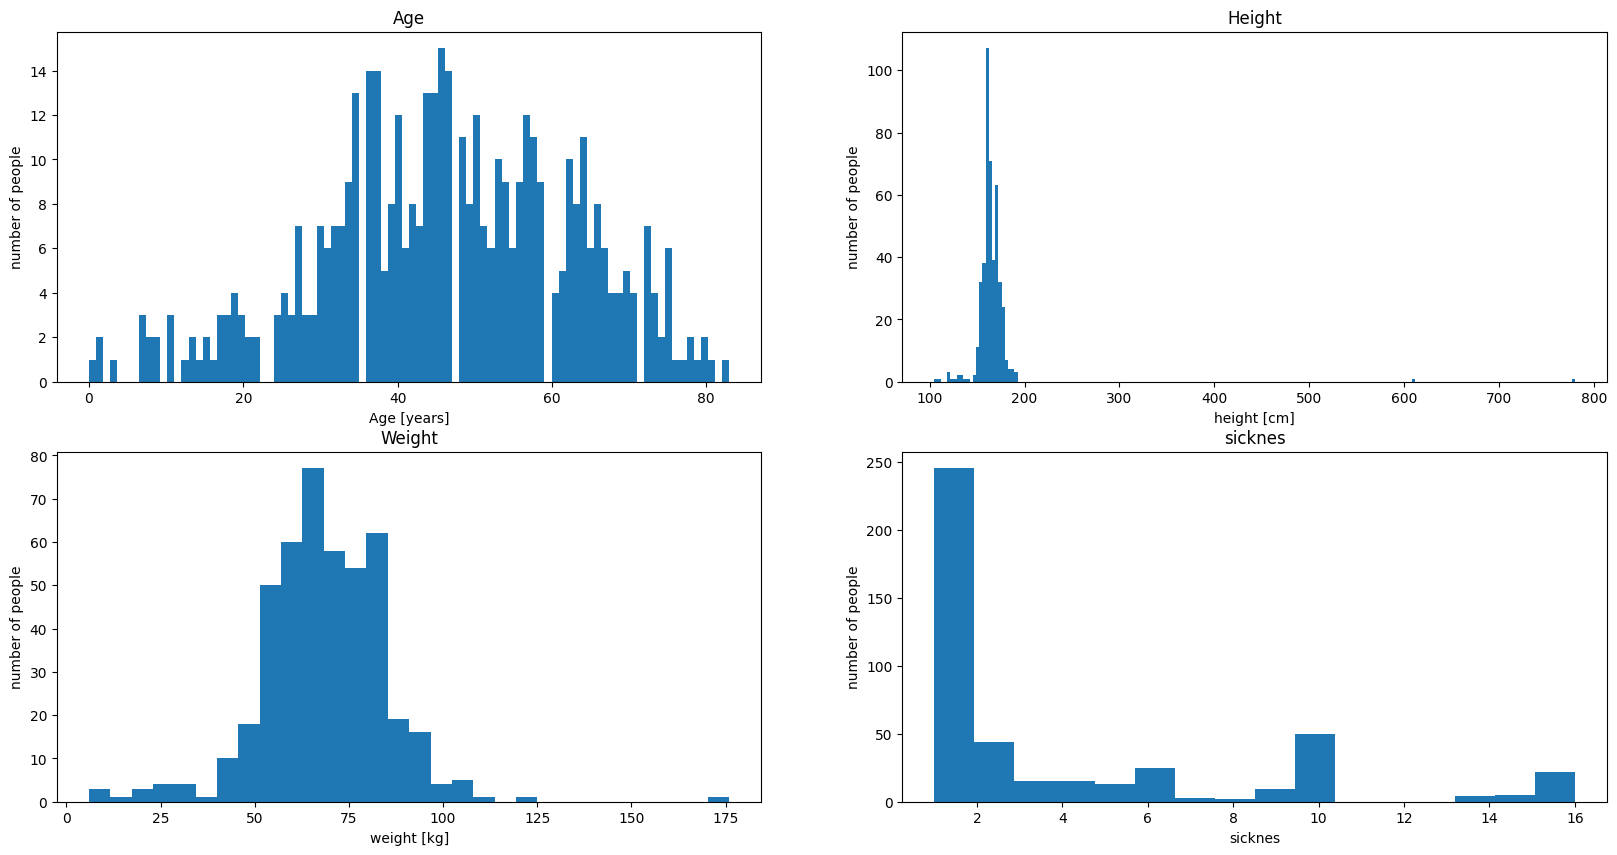

In [ ]:
dataset=[data["Age"],data["Height"],data["Weight"],data["sicknes"]]
titles=["Age","Height","Weight","sicknes"]
xlabels=["Age [years]","height [cm]","weight [kg]","sicknes"]
ylabels=["number of people" for _ in range(len(xlabels))]
nbins=[90,200,30,16]
figsize=[20,10]

create_histograms(2,2,fig_size=figsize,dataset=dataset,titles=titles,xlabel=xlabels,ylabel=ylabels,n_bins=nbins)


USUWANIE/NAPRAWIANIA WADLIWYCH DANYCH

In [ ]:
def give_index_of_inccoret_values(data,column,max_val,min_val):
    indexs=[]
    for i,dt in enumerate(data[column]):
        if(dt<min_val or dt>max_val):
            indexs.append(i)
    return [column ,indexs]
give_index_of_inccoret_values(data,"Height",200,10)

['Height', [141, 316]]

In [ ]:
give_index_of_inccoret_values(data,"Weight",150,0)

['Weight', [213]]

In [ ]:
import numpy as np

def give_index_of_not_fitting_vlaue(data, threshold=3):
    median = np.median(np.array(data))
    deviation = np.abs(data - median)
    median_deviation = np.median(deviation)
    modified_z_score = 0.6745 * deviation / median_deviation if median_deviation > 0 else 0
    indexes = np.where(modified_z_score > threshold)[0]
    return indexes

give_index_of_not_fitting_vlaue(data["Height"])


array([ 60, 113, 141, 198, 210, 297, 316, 320, 379, 401, 403, 424, 429])

Jak wyżej widac modyfikowanie danych któ©e znacznie odbiegaja od mediany nie jest koniecznie dobre, dlatego "czasami" lepiej jest uciąc dane które w 100% są błędne ,takie jak podaje funkcja give_index_of_inccoret_values()

In [ ]:
pd.DataFrame(data).to_csv("better_data_type.csv")

In [ ]:
max_min_values=[]
for column in data.columns:
    print(column)
    max_min_values.append([column,np.max(data[column]),np.min(data[column])])
pd.DataFrame(max_min_values).to_csv(data_info_root+"max_min_val.csv")

Age
Sex
Height
Weight
QRS_duration
P-R_interval
Q-T_interval
T_interval
P_interval
QRS
T
P
QRST
Heart_rate
Q_wave
R_wave
S_wave
R'_wave
S'_wave
Number_of_intrinsic_deflections
Existence_of_ragged_R_wave
Existence_of_diphasic_derivation_of_R_wave
Existence_of_ragged_P_wave
Existence_of_diphasic_derivation_of_P_wave
Existence_of_ragged_T_wave
Existence_of_diphasic_derivation_of_T_wave
DII_0
DII_1
DII_2
DII_3
DII_4
DII_5
DII_6
DII_7
DII_8
DII_9
DII_10
DII_11
DIII_0
DIII_1
DIII_2
DIII_3
DIII_4
DIII_5
DIII_6
DIII_7
DIII_8
DIII_9
DIII_10
DIII_11
AVR_0
AVR_1
AVR_2
AVR_3
AVR_4
AVR_5
AVR_6
AVR_7
AVR_8
AVR_9
AVR_10
AVR_11
AVL_0
AVL_1
AVL_2
AVL_3
AVL_4
AVL_5
AVL_6
AVL_7
AVL_8
AVL_9
AVL_10
AVL_11
AVF_0
AVF_1
AVF_2
AVF_3
AVF_4
AVF_5
AVF_6
AVF_7
AVF_8
AVF_9
AVF_10
AVF_11
V1_0
V1_1
V1_2
V1_3
V1_4
V1_5
V1_6
V1_7
V1_8
V1_9
V1_10
V1_11
V2_0
V2_1
V2_2
V2_3
V2_4
V2_5
V2_6
V2_7
V2_8
V2_9
V2_10
V2_11
V3_0
V3_1
V3_2
V3_3
V3_4
V3_5
V3_6
V3_7
V3_8
V3_9
V3_10
V3_11
V4_0
V4_1
V4_2
V4_3
V4_4
V4_5
V4_6
V4_7
V4_8
V

Po odczytaniu wartosci maksymalnych i minimalnych dla całego data'setu mozemy zauwazyc ze niektóre wartosci maja 0 jednocesnie jako maksymalna i minimalna wartosc, przez co nie niosa zadnej infomacji dlatego nalezy je usunąć

In [ ]:
max_heigh=np.max(data["Height"])
max_heigh_index=np.argmax(data["Height"])
print(max_heigh,max_heigh_index)

data.iloc[141]

780 141


Age               1.0
Sex               1.0
Height          780.0
Weight            6.0
QRS_duration     85.0
                ...  
V6_2_6            1.3
V6_2_7            0.7
V6_2_8            2.7
V6_2_9            5.5
sicknes           5.0
Name: 141, Length: 279, dtype: float64